# WeatherPy
----

#### Note
* Linear Regression plot between Max Temp and Latitude indicates that the maximum temperature increases as we get closer to the equator and decreases as we go away from the equator for both hemispheres
* Linear Regression plot between Humidity and Latitude indicates that the humidity tends to be a little higher near the equators but stays close to constant over the rest of the hemispheres
* Linear Regression plot between Cloudiness and Latitude indicates that there is little to no relationship between the two variables. Cloudiness tends to occur at all levels across all latitudes.
* Linear Regression plot between Wind Speed and Latitude indicates that there is little to no relationship between the two variables. Wind Speed appears at all levels across all latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import sys
%matplotlib inline
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Set-up the base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Initialize the lists
city_name=[]
lat=[]
lng=[]
max_temp=[]
clouds=[]
humidity=[]
wind=[]
country=[]
date=[]


# Save the requested parameters frm the API response to a .csv file with UTF-8 encoding
with open(output_data_file, "w", newline='', encoding='utf8') as datafile:
    writer = csv.writer(datafile)
    
    # Write the header of the .csv file
    writer.writerow(["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
    for city in cities:
        try:
            query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
            response = requests.get(query_url)         
           
            # Convert into a json
            weather_response = response.json()

            writer.writerow([weather_response['name'], weather_response['coord']['lat'], weather_response['coord']['lon'], weather_response['main']['temp_max'], weather_response['main']['humidity'], weather_response['clouds']['all'], weather_response['wind']['speed'], weather_response['sys']['country'], weather_response['dt']])
            city_name.append(weather_response['name'])
            lat.append(weather_response['coord']['lat']) 
            lng.append(weather_response['coord']['lon'])
            max_temp.append(weather_response['main']['temp_max'])
            clouds.append(weather_response['clouds']['all'])
            humidity.append(weather_response['main']['humidity']) 
            wind.append(weather_response['wind']['speed'])
            country.append(weather_response['sys']['country'])
            date.append(weather_response['dt'])
            print(f"Processing Record {cities.index(city)} | {city}")
        except(KeyError, IndexError):
            print("Missing field/result......skipping.")


{'cod': 429, 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}
Missing field/result......skipping.
{'cod': 429, 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}
Missing field/result......skipping.
{'cod': 429, 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}
Missing field/result......skipping.
{'cod': 429, 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}
Missing field/result......skipping.
{'cod': 429, 'message': 'Your account is temporary blocked due t

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Print the length of each column to verify that all of them are populated
print(f"City {len(city_name)}")
print(f"Latitude {len(lat)}")
print(f"Longitude {len(lng)}")
print(f"Max Temp {len(max_temp)}")
print(f"Cloudiness {len(clouds)}")
print(f"Humidity {len(humidity)}")
print(f"Wind Speed {len(wind)}")
print(f"Country {len(country)}")
print(f"Date {len(date)}")

City 541
Latitude 541
Longitude 541
Max Temp 541
Cloudiness 541
Humidity 541
Wind Speed 541
Country 541
Date 541


In [6]:
# Read the .csv file with the weather data from the API
weather_csv_path = "output_data/cities.csv"
weather_df = pd.read_csv(weather_csv_path)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,77.23,78,23,17.58,PF,1595458253
1,Husavik,66.04,-17.34,48.20,81,90,9.17,IS,1595458513
2,Rozivka,46.94,35.77,62.40,62,9,7.96,UA,1595458771
3,Busselton,-33.65,115.33,57.00,48,33,20.00,AU,1595458500
4,Bluff,-46.60,168.33,39.00,83,96,3.00,NZ,1595458500
...,...,...,...,...,...,...,...,...,...
536,Birjand,32.87,59.22,78.80,15,0,9.17,IR,1595458837
537,Coari,-4.08,-63.14,78.78,77,35,1.41,BR,1595458820
538,Mahajanga,-15.72,46.32,66.88,62,66,9.44,MG,1595458837
539,Lumeje,-11.55,20.78,55.20,43,0,5.93,AO,1595458838


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Describe the data frame to verify whether Humidity is > 100%
summary_df = weather_df.describe()
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,18.424177,19.061017,68.485933,71.295749,49.101664,7.767043,1.595459e+09
std,33.332042,89.343727,13.713093,20.138257,37.856831,5.375437,1.592573e+02
min,-54.800000,-175.200000,19.400000,3.000000,0.000000,0.270000,1.595458e+09
25%,-8.500000,-56.140000,58.320000,60.000000,7.000000,3.400000,1.595459e+09
50%,20.890000,21.550000,69.840000,75.000000,47.000000,6.910000,1.595459e+09
75%,46.940000,98.300000,78.800000,86.000000,88.000000,10.560000,1.595459e+09
max,78.220000,179.320000,103.750000,100.000000,100.000000,32.210000,1.595459e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

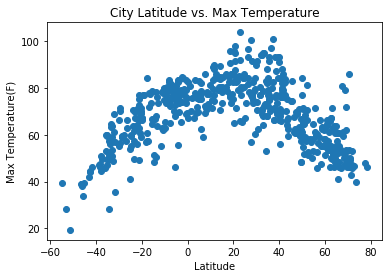

In [11]:
# Setup the x and y values and labels for the scatter plot and plot it
x_value = weather_df["Lat"]
y_value = weather_df["Max Temp"]

plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title("City Latitude vs. Max Temperature")

plt.scatter(x_value, y_value)

#  Save an image of the chart and print to screen

plt.savefig("output_data/Images/LatVsTemp.png") 
plt.show()

## Latitude vs. Humidity Plot

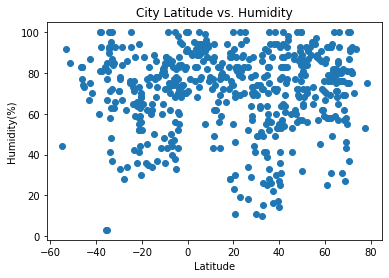

In [12]:
# Setup the x and y values and labels for the scatter plot and plot it

x_value = weather_df["Lat"]
y_value = weather_df["Humidity"]

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")

plt.scatter(x_value, y_value)

#  Save an image of the chart and print to screen

plt.savefig("output_data/Images/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

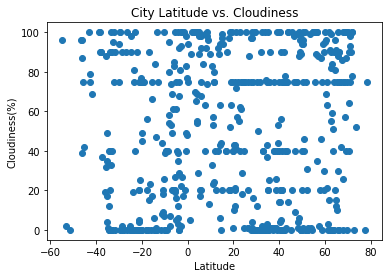

In [13]:
# Setup the x and y values and labels for the scatter plot and plot it
x_value = weather_df["Lat"]
y_value = weather_df["Cloudiness"]

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")

plt.scatter(x_value, y_value)
#  Save an image of the chart and print to screen

plt.savefig("output_data/Images/LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

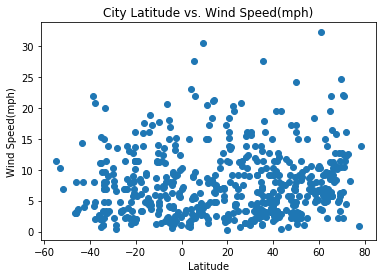

In [14]:
# Setup the x and y values and labels for the scatter plot and plot it
x_value = weather_df["Lat"]
y_value = weather_df["Wind Speed"]

plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed(mph)")

plt.scatter(x_value, y_value)

#  Save an image of the chart and print to screen

plt.savefig("output_data/Images/LatVsWindSpeed.png") 
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg(x_val,y_val):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [16]:
# Create Northern Hemisphere DataFrame
northern_data_df = weather_df.loc[(weather_df["Lat"] >= 0)]
northern_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Husavik,66.04,-17.34,48.20,81,90,9.17,IS,1595458513
2,Rozivka,46.94,35.77,62.40,62,9,7.96,UA,1595458771
5,Bethel,41.37,-73.41,80.01,88,75,5.17,US,1595458516
6,Albany,42.60,-73.97,84.00,69,78,2.39,US,1595458205
7,Hasaki,35.73,140.83,75.00,100,75,3.36,JP,1595458762
...,...,...,...,...,...,...,...,...,...
532,Buchanan,5.88,-10.05,75.20,94,75,9.55,LR,1595458837
533,Abay,49.63,72.85,48.20,100,0,6.71,KZ,1595458837
534,Mikhaylovka,50.06,43.24,59.00,89,0,1.99,RU,1595458837
536,Birjand,32.87,59.22,78.80,15,0,9.17,IR,1595458837


In [17]:
# Create Southern Hemisphere DataFrame
southern_data_df = weather_df.loc[(weather_df["Lat"] < 0)]
southern_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,77.23,78,23,17.58,PF,1595458253
3,Busselton,-33.65,115.33,57.00,48,33,20.00,AU,1595458500
4,Bluff,-46.60,168.33,39.00,83,96,3.00,NZ,1595458500
8,Ushuaia,-54.80,-68.30,39.20,44,96,11.41,AR,1595458316
9,Cape Town,-33.93,18.42,55.99,100,0,2.24,ZA,1595458501
...,...,...,...,...,...,...,...,...,...
530,Newcastle,-32.93,151.78,51.01,100,40,11.41,AU,1595458694
535,Alta Floresta,-9.88,-56.09,79.02,36,0,3.47,BR,1595458837
537,Coari,-4.08,-63.14,78.78,77,35,1.41,BR,1595458820
538,Mahajanga,-15.72,46.32,66.88,62,66,9.44,MG,1595458837


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45761919541250407


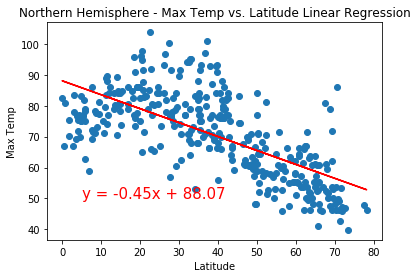

In [18]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Max Temp"]
a = 5
b = 50


title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temp"

# Call the function
lin_reg(x_val,y_val)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6561534193894135


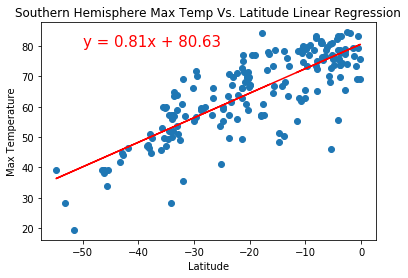

In [19]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Max Temp"]
a = -50
b = 80

title = "Southern Hemisphere Max Temp Vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temperature"

# Invoke function
lin_reg(x_val,y_val)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010441545821425824


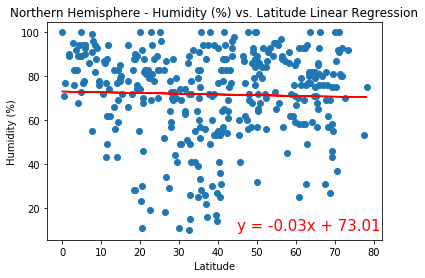

In [20]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Humidity"]
a = 45
b = 10
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
xlabel = 'Latitude'
ylabel = 'Humidity (%)'

# Invoke function
lin_reg(x_val,y_val)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0023076876904389084


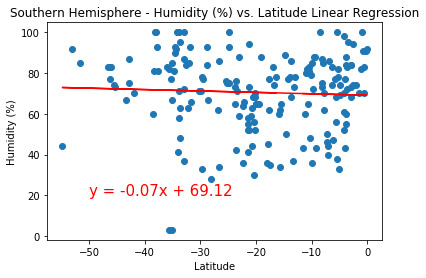

In [21]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Humidity"]
a = -50
b = 20
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 9.087460694192432e-05


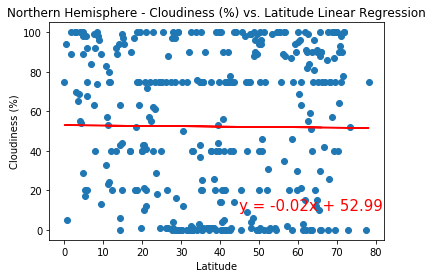

In [22]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Cloudiness"]
a = 45
b = 10
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005807385990385327


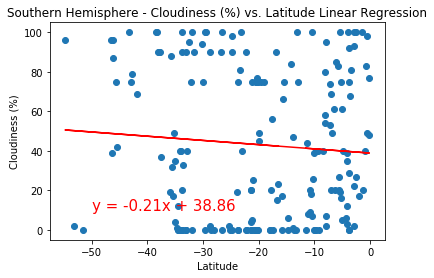

In [23]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Cloudiness"]
a = -50
b = 10
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005728670845963648


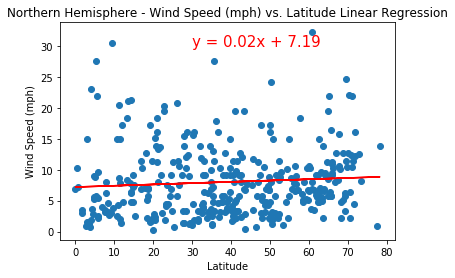

In [24]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Wind Speed"]
a = 30
b = 30
xlabel = 'Latitude'
ylabel = 'Wind Speed (mph)'
title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00012414435647964766


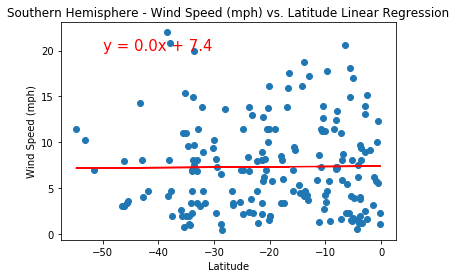

In [25]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Wind Speed"]
a = -50
b = 20
xlabel = 'Latitude'
ylabel = 'Wind Speed (mph)'
title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)